In [97]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
  
# metadata 
print(real_estate_valuation.metadata) 
  
# variable information 
print(real_estate_valuation.variables) 

{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh, Tzu-Kuang Hsu', 'published_

In [98]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [99]:
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


Data Exploration:

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64
       X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148971     17.712560   
std               0.281967     11.392485   
min            2012.667000      0.000000   
25%            2012.917000      9.025000   
50%            2013.167000     16.100000   
75%            2013.417000     28.150000   
max            2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                             

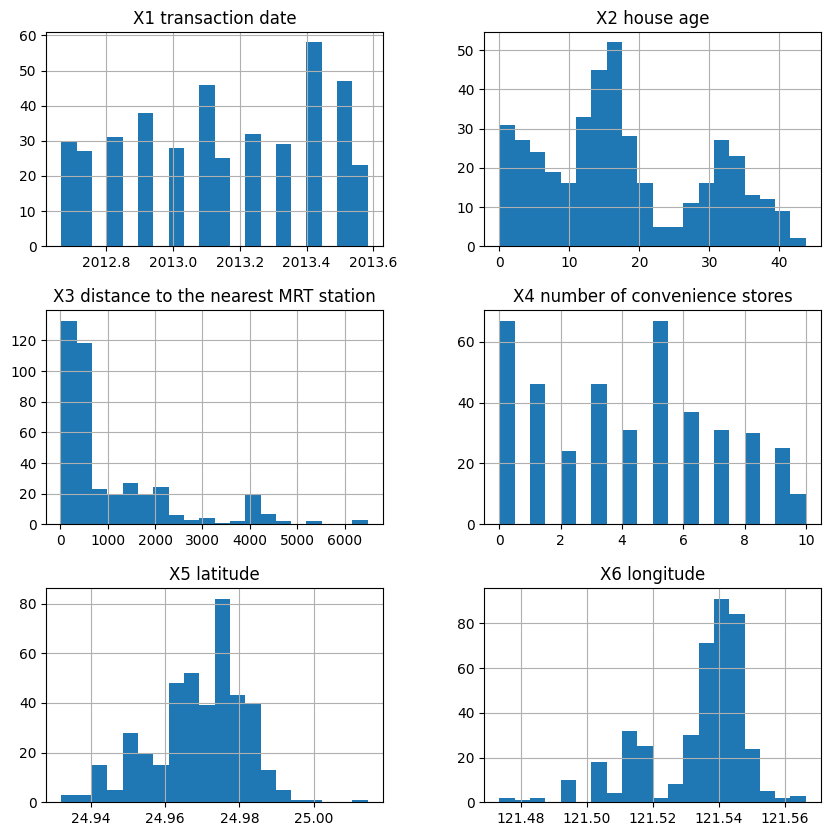

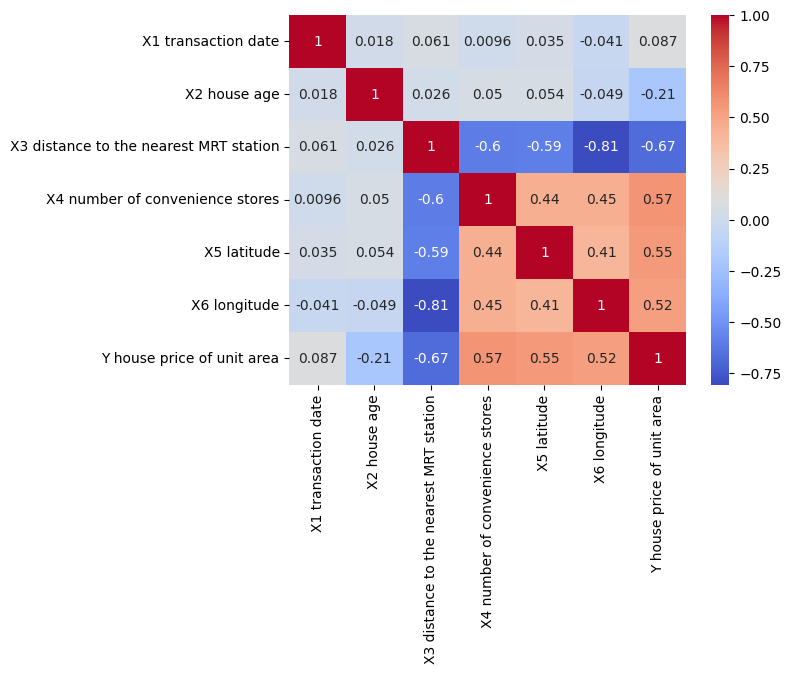

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(X.isnull().sum())

# Summary statistics of the features
print(X.describe())

# Visualize distributions of the features
X.hist(bins=20, figsize=(10, 10))
plt.show()

# Check correlation between features and target
df = pd.concat([X, y], axis=1)  # Combine features and target for heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Data Preprocessing:

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

y = np.array(y).ravel()  # Convert y to a 1D array

# Split data into training, validation, and test sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Modeling:

In [102]:
from sklearn.linear_model import LinearRegression

# Create the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = linear_model.predict(X_val_scaled)

Evaluation:

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model on the validation set
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MAE: {mae}")
print(f"Validation MSE: {mse}")
print(f"Validation R-squared: {r2}")

Validation MAE: 6.89301555729319
Validation MSE: 95.61375941759097
Validation R-squared: 0.4268898707817391


In [104]:
# Make predictions on the test set
y_test_pred = linear_model.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae_test}")
print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")

Test MAE: 5.487898062856012
Test MSE: 51.87292590749299
Test R-squared: 0.6889392624817565


Calculating accuracy and confusion matrix:

In [105]:
# Feature importance
import pandas as pd

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})

coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

                                  Feature  Coefficient  Absolute Coefficient
2  X3 distance to the nearest MRT station    -6.404436              6.404436
3         X4 number of convenience stores     3.205465              3.205465
4                             X5 latitude     2.989293              2.989293
1                            X2 house age    -2.760935              2.760935
0                     X1 transaction date     1.651220              1.651220
5                            X6 longitude    -0.787719              0.787719


Conclusion for linear regression:

The Mean Absolute Error (MAE) of 5.49 indicates the average deviation of the predicted house prices from the actual prices, measured in the same units as the target variable. This is a reasonable error metric to gauge how far off predictions are on average.
The Mean Squared Error (MSE) of 51.87 penalizes larger errors more heavily. This suggests that there are some predictions that are further off, which could be investigated further.
The R-squared value of 0.69 means that approximately 69% of the variance in the house prices is explained by the model. This indicates a moderate level of fit; the model captures a significant portion of the variance but there is still room for improvement.

X3 (Distance to the nearest MRT station) has the highest absolute coefficient value (6.40), suggesting it has the most significant impact on the house price. A higher distance to the MRT station decreases the house price.
X4 (Number of convenience stores) and X5 (Latitude) also have substantial coefficients, indicating they play important roles in determining the house price.
X6 (Longitude) has the smallest absolute coefficient (0.79), suggesting it has the least impact on house prices compared to other features.
Overall, the linear regression model provides a reasonable fit to the data, but there is still room for improvement. More advanced models could be explored to potentially improve the predictive performance.

Logistic Regression Model:

Data Preprocessing:

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

# Assuming X and y are already loaded
X = np.array(X)
y = np.array(y).ravel()  # Convert y to a 1D array

# Convert the target variable to binary
average_price = np.mean(y)
y_binary = (y > average_price).astype(int)  # 1 if above average, 0 if below or equal

# Create DataFrame for feature names
feature_names = np.array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])  # Convert to numpy array for indexing

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binary, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Modeling:

Validation Accuracy: 0.7580645161290323
Validation Precision: 0.6571428571428571
Validation Recall: 0.8846153846153846
Validation F1 Score: 0.7540983606557377


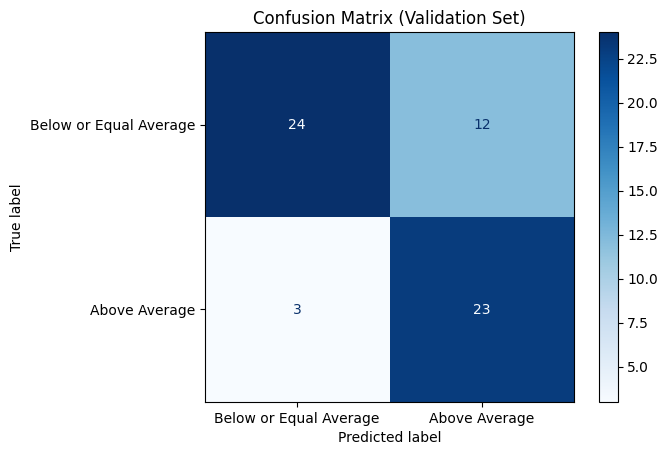

In [107]:
# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = logistic_model.predict(X_val_scaled)
y_val_prob = logistic_model.predict_proba(X_val_scaled)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")
print(f"Validation F1 Score: {f1}")

# Confusion Matrix for Validation Set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(conf_matrix_val, display_labels=['Below or Equal Average', 'Above Average'])
disp_val.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

Test Accuracy: 0.873015873015873
Test Precision: 0.7941176470588235
Test Recall: 0.9642857142857143
Test F1 Score: 0.8709677419354839


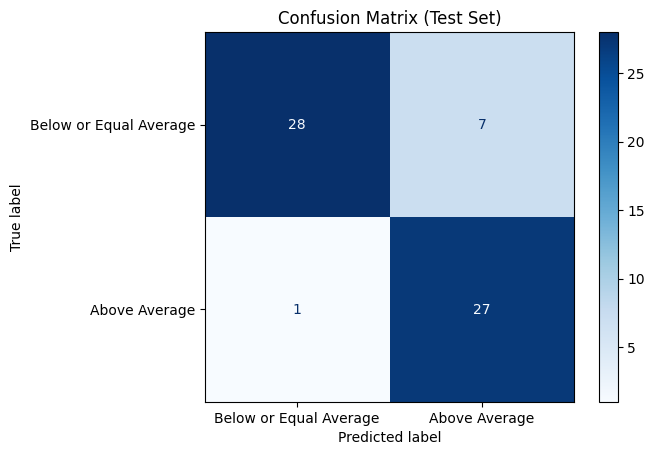

In [108]:
# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test_scaled)
y_test_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(conf_matrix_test, display_labels=['Below or Equal Average', 'Above Average'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Test Set)')
plt.show()


Feature importance:


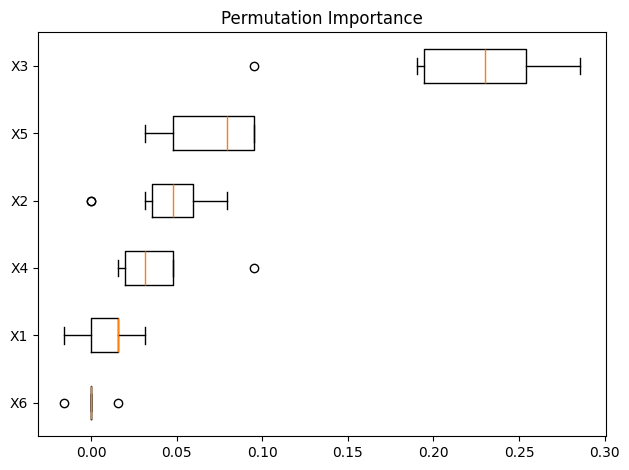

In [109]:
# Feature importance using permutation importance
result = permutation_importance(logistic_model, X_test_scaled, y_test, n_repeats=10, scoring='accuracy', random_state=0, n_jobs=-1)

# Convert feature names to numpy array for proper indexing
sorted_idx = np.argsort(result.importances_mean)

# Plot permutation importance
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=feature_names[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

Conclusion for logistic regression:

Model Performance:

Test Accuracy: 0.873
The model correctly classifies 87.3% of the test instances. This indicates a high level of overall correctness.

Test Precision: 0.794
Out of all instances predicted as positive, 79.4% are actually positive. This shows that the model has a good balance in minimizing false positives.

Test Recall: 0.964
The model correctly identifies 96.4% of all actual positive instances. High recall indicates that the model is very good at capturing positives but might have a higher false positive rate.

Test F1 Score: 0.871
The F1 Score, which balances precision and recall, is quite high, indicating a strong performance in handling both false positives and false negatives.


Feature Importance Analysis:

X3 (Distance to the nearest MRT station) has the highest mean importance (0.2206) and is clearly the most influential feature for predicting whether a house price is above or below average. This suggests that the distance to the nearest MRT station plays a crucial role.

X5 (Latitude) and X2 (House Age) also show significant importance, indicating they contribute considerably to the prediction.

X4 (Number of convenience stores) and X1 (Transaction date) have lower importance scores, suggesting they have less impact on the target variable.

X6 (Longitude) has the smallest importance score and might be the least useful feature

Standardizing the features:
Standardization helps in bringing all features to a common scale, which is important for models like logistic regression that are sensitive to the scale of input features.
